In [1]:
import pandas as pd
import numpy as np
from agent import Agent
from trading_env import TradingEnv
from trading_env_plotter import TradingEnvPlotter
from sklearn.model_selection import train_test_split

In [5]:
# Hyperparameters
EPISODES = 2 #300
LEARNING_RATE = 0.01
GAMMA = 0.99
INPUT_DIM = 1


df = pd.read_csv('../csv/BTCUSDT_1m_20210801_20221231.csv')

# Assume 80% of the data is used for training and 20% for testing
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)

prices = train_df['close'].values

env = TradingEnv(prices)
agent = Agent(INPUT_DIM, action_dim=5, learning_rate=LEARNING_RATE, gamma=GAMMA)
plotter = TradingEnvPlotter(env)

for episode in range(1, EPISODES + 1):
    state = env.reset()
    total_reward = 0

    while True:
        action = agent.select_action(state)
        next_state, reward, done = env.step(action)

        # teFor visualization later
        plotter.record_step(action)
        plotter.record_episode_reward(total_reward)

        agent.train(state, action, reward, next_state, done)

        state = next_state
        total_reward += reward
        # print(reward

        agent.step_scheduler()

        if done:
            break

    print(f"Episode {episode}/{EPISODES} - Total Reward: {total_reward:.2f}")

# Visualization after training
plotter.plot_balance()
plotter.plot_actions()
plotter.plot_prices_and_trades()
plotter.plot_episode_rewards()


Episode 1/300 - Total Reward: 30617.80
Episode 2/300 - Total Reward: 21854.85
Episode 3/300 - Total Reward: 21104.20
Episode 4/300 - Total Reward: 23884.11
Episode 5/300 - Total Reward: 23765.07
Episode 6/300 - Total Reward: 24784.85
Episode 7/300 - Total Reward: 22994.13
Episode 8/300 - Total Reward: 21577.83
Episode 9/300 - Total Reward: 22848.58
Episode 10/300 - Total Reward: 22496.07
Episode 11/300 - Total Reward: 23864.48
Episode 12/300 - Total Reward: 23858.98
Episode 13/300 - Total Reward: 21911.84
Episode 14/300 - Total Reward: 20720.03
Episode 15/300 - Total Reward: 20906.51
Episode 16/300 - Total Reward: 21971.89
Episode 17/300 - Total Reward: 22361.96
Episode 18/300 - Total Reward: 22665.08
Episode 19/300 - Total Reward: 22534.49
Episode 20/300 - Total Reward: 23720.16
Episode 21/300 - Total Reward: 20983.08
Episode 22/300 - Total Reward: 19776.44
Episode 23/300 - Total Reward: 21795.82
Episode 24/300 - Total Reward: 21420.67
Episode 25/300 - Total Reward: 23569.27
Episode 2

In [3]:
agent.save_model('../model/model_scalping.pth')

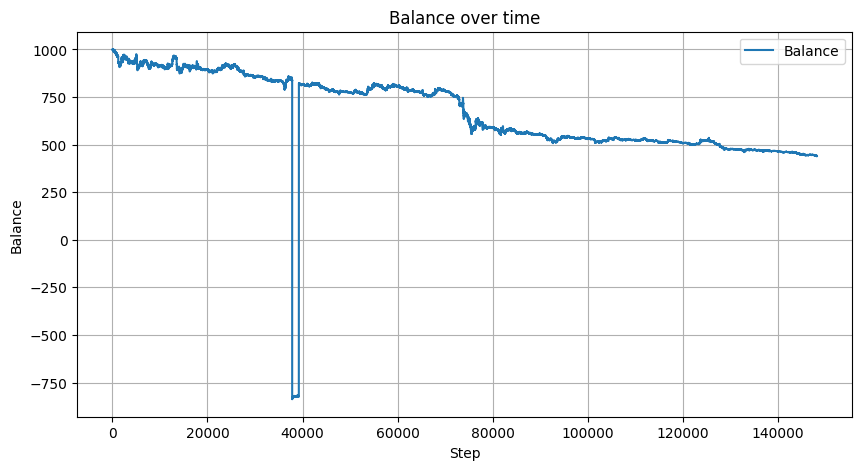

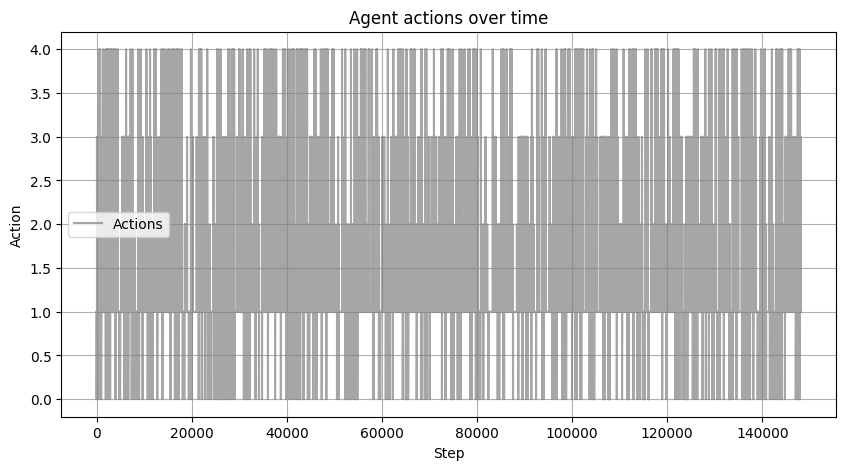

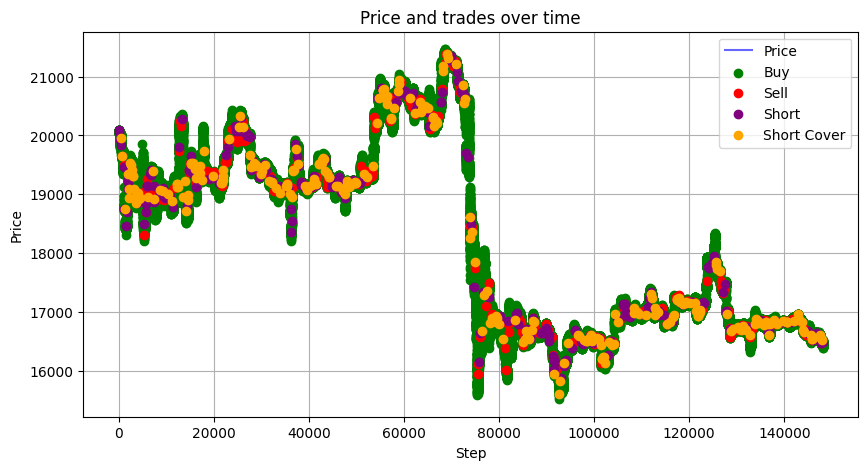

In [4]:
# Inference Phase
test_prices = test_df['close'].values

test_env = TradingEnv(test_prices)
test_plotter = TradingEnvPlotter(test_env)

# Load the trained model for inference
agent.load_model('../model/model_scalping.pth')

state = test_env.reset()
while True:
    action = agent.select_action(state)
    next_state, _, done = test_env.step(action)  # We don't need reward during inference

    # For visualization
    test_plotter.record_step(action)

    state = next_state
    if done:
        break

# Visualization after inference
test_plotter.plot_balance()
test_plotter.plot_actions()
test_plotter.plot_prices_and_trades()
